In [2]:

pip install python-igraph


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pycairo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import simulation_functions
import configuration_functions
import ipywidgets as widgets
from IPython.display import display
import igraph as ig

In [6]:
print("Choose graph generation file")
uploader = widgets.FileUpload(description = "Upload graph generation file")
display(uploader)

Choose graph generation file


FileUpload(value={}, description='Upload graph generation file')

In [8]:

graphgen_filename = list(uploader.value.keys())[0]
print("Extracting content from file: " + graphgen_filename)
graphgen_filecontent = uploader.data[0].decode()
print("The following is the raw content of the file: ")
print(graphgen_filecontent)


Extracting content from file: contentapi.nswag
The following is the raw content of the file: 
{
  "runtime": "Net50",
  "defaultVariables": null,
  "documentGenerator": {
    "fromDocument": {
      "json": "{\r\n  \"openapi\": \"3.0.1\",\r\n  \"info\": {\r\n    \"title\": \"ContentApi.Web\",\r\n    \"description\": \"Cache: \\n- All the GET endpoints below containing the documentation text '#uses cache' uses the cache to retrieve data. \\n The cache has an absolute expiration of 30 days after creation. \\n- All the POST/PUT/DELETE endpoints below containing the documentation text '#updates cache' handles invalidation of cache \\n\\nSubset query example explained: \\n ![alt text](/images/content_subset_query_explained.png)\",\r\n    \"version\": \"v1\"\r\n  },\r\n  \"paths\": {\r\n    \"/api/v1/Content/{apiKeyName}\": {\r\n      \"get\": {\r\n        \"tags\": [\r\n          \"Content\"\r\n        ],\r\n        \"summary\": \"Returns all contents matching query\",\r\n        \"paramete

In [9]:
file_validation_result = configuration_functions.validate_file_content(graphgen_filecontent)
print(file_validation_result)

File format was succesfully validated


The object extracted from the file: 
[[1, 2], [2, 8], [8, 1], [1, 12]]
Vertices: 13
Vertex labels: 
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
The following object (without taking into account the colouring) visualized


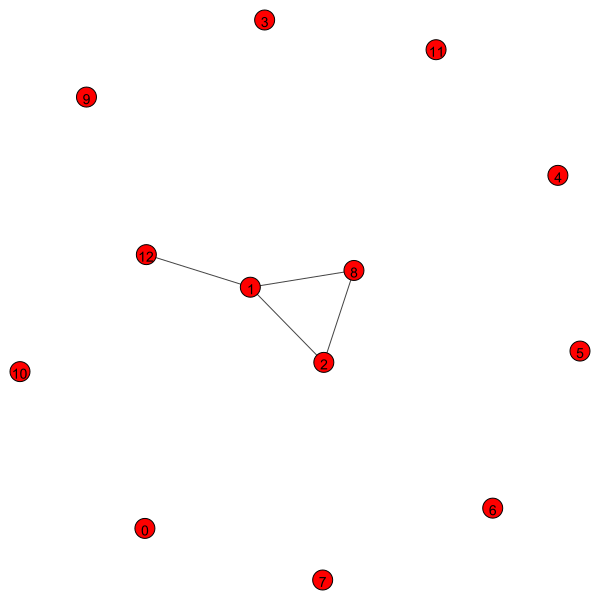

In [11]:
graph_list_of_lists = configuration_functions.convert_file_content_to_list_of_lists(graphgen_filecontent)
print("The object extracted from the file: ")
print(graph_list_of_lists)

vertices = max(max(edge) for edge in graph_list_of_lists) + 1
print("Vertices: " + str(vertices))
display_friendly_version_of_graph = ig.Graph()
display_friendly_version_of_graph.add_vertices(vertices)
display_friendly_version_of_graph.add_edges(graph_list_of_lists)

# Generate a list of vertex labels
vertex_labels = [str(i) for i in range(vertices)]
print("Vertex labels: ")
print(vertex_labels)
# Assign the labels to the vertices
display_friendly_version_of_graph.vs["label"] = vertex_labels
print("The following object (without taking into account the colouring) visualized")

ig.plot(display_friendly_version_of_graph)
    


In [7]:
print("Choose colouring")

initial_colouring_options = ["All 0", "All 1", "Random"]

initial_colouring = ""
#Function som bliver kaldt når der bliver valgt en option 
def choose_colouring(option):
    initial_colouring = option
    print("You choose: " + option)

widgets.interact(choose_colouring, option=initial_colouring_options)



Choose colouring


interactive(children=(Dropdown(description='option', options=('All 0', 'All 1', 'Random'), value='All 0'), Out…

<function __main__.choose_colouring(option)>

In [8]:
print("Choose update procedure")

update_procedures = simulation_functions.get_update_procedures()

update_procedure = ""
#Function som bliver kaldt når der bliver valgt en option
def choose_procedure(option):
    update_procedure = option
    print("You choose: " + option)
    
widgets.interact(choose_procedure, option=update_procedures)

Choose update procedure


interactive(children=(Dropdown(description='option', options=('Ordered', 'MaxViolation', 'MonteCarlo'), value=…

<function __main__.choose_procedure(option)>